In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 
from torchvision import datasets, transforms

## Logistic regression model

### MNIST dataset
Dataset consists of 70000 grayscale images of handwritten digits, of dimensions 28x28.

In [2]:
#It downloads and transforms the data into a tensor
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.00

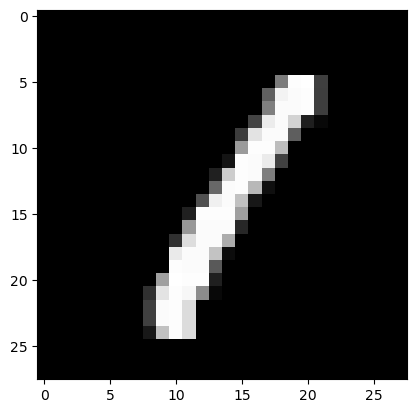

In [3]:
print(mnist_train[2])

# Pick out the 4th (0-indexed) example from the training set
image, label = mnist_train[3]

# Plot the image
print("Default image shape: {}".format(image.shape))
image = image.reshape([28,28])
print("Reshaped image shape: {}".format(image.shape))
plt.imshow(image, cmap="gray")

# Print the label
print("The label for this image: {}".format(label))

In [4]:
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000
Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


DataLoader will take care of shuffling and batching:

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [6]:
data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)

print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])
Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])


### Logistic regression model
We would start building our model.

#### The forward pass


In [7]:
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))

The shape of input x: torch.Size([100, 784])
The shape of input x: torch.Size([100, 784])


Y = XW + b
The minibatch size  𝑚  is  100 , the dimension of the data is  28×28=784 , and the number of classes  𝑐  is  10 . While  𝑋  and  𝑌  are matrices due to the batching, conventionally, they are often given lowercase variable names

In [8]:
# Randomly initialize weights W
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

# Initialize bias b as 0s
b = torch.zeros(10, requires_grad=True)

In [9]:
# Linear transformation with W and b
y = torch.matmul(x, W) + b  #forward pass through the layer

Now we use softmax fiunction to compute probability

In [10]:
# Option 1: Softmax to probabilities from equation
py_eq = torch.exp(y) / torch.sum(torch.exp(y), dim=1, keepdim=True)
print("py[0] from equation: {}".format(py_eq[0]))

# Option 2: Softmax to probabilities with torch.nn.functional
import torch.nn.functional as F
py = F.softmax(y, dim=1)
print("py[0] with torch.nn.functional.softmax: {}".format(py[0]))

py[0] from equation: tensor([0.1313, 0.1262, 0.0504, 0.0603, 0.1386, 0.1192, 0.0981, 0.1155, 0.0572, 0.1032],
       grad_fn=<SelectBackward0>)
py[0] with torch.nn.functional.softmax: tensor([0.1313, 0.1262, 0.0504, 0.0603, 0.1386, 0.1192, 0.0981, 0.1155, 0.0572, 0.1032],
       grad_fn=<SelectBackward0>)
py[0] from equation: tensor([0.1313, 0.1262, 0.0504, 0.0603, 0.1386, 0.1192, 0.0981, 0.1155, 0.0572, 0.1032],
       grad_fn=<SelectBackward0>)
py[0] with torch.nn.functional.softmax: tensor([0.1313, 0.1262, 0.0504, 0.0603, 0.1386, 0.1192, 0.0981, 0.1155, 0.0572, 0.1032],
       grad_fn=<SelectBackward0>)


𝐻𝑦′(𝑦)=−∑𝑖𝑦′𝑖log(𝑦𝑖)  : Cros entropy loss which we minimize

In [11]:
# Cross-entropy loss from equation
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

# Option 2: cross-entropy loss with torch.nn.functional
cross_entropy = F.cross_entropy(y, labels)
print("cross entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

cross entropy from equation: 2.313839912414551
cross entropy with torch.nn.functional.cross_entropy: 2.313839912414551
cross entropy from equation: 2.313839912414551
cross entropy with torch.nn.functional.cross_entropy: 2.313839912414551


#### The backward pass

In [12]:
# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)  #stochastic gradient descent with learning rate of 0.1
cross_entropy.backward() # To compute the gradients for  𝑊  and  𝑏 , we call the backward() function on the cross-entropy loss.

In [13]:
b.grad

tensor([-1.6997e-02,  2.6117e-02, -2.5668e-02,  4.7033e-03,  4.2749e-02, -7.5222e-05,  3.5005e-02,
        -1.7591e-03, -2.0717e-02, -4.3357e-02])

In [14]:
#To apply the gradients, we could manually update  𝑊  and  𝑏  using the update rule  𝜃𝑡+1=𝜃𝑡−𝛼∇𝜃 , but since we have an optimizer, we can tell it to perform the update step for us:
optimizer.step() 

In [15]:
b

tensor([ 1.6997e-03, -2.6117e-03,  2.5668e-03, -4.7033e-04, -4.2749e-03,  7.5222e-06, -3.5005e-03,
         1.7591e-04,  2.0717e-03,  4.3357e-03], requires_grad=True)

In [16]:
print("b.grad before zero_grad(): {}".format(b.grad))
optimizer.zero_grad()
print("b.grad after zero_grad(): {}".format(b.grad))

b.grad before zero_grad(): tensor([-1.6997e-02,  2.6117e-02, -2.5668e-02,  4.7033e-03,  4.2749e-02, -7.5222e-05,  3.5005e-02,
        -1.7591e-03, -2.0717e-02, -4.3357e-02])
b.grad after zero_grad(): None
b.grad before zero_grad(): tensor([-1.6997e-02,  2.6117e-02, -2.5668e-02,  4.7033e-03,  4.2749e-02, -7.5222e-05,  3.5005e-02,
        -1.7591e-03, -2.0717e-02, -4.3357e-02])
b.grad after zero_grad(): None


#### Model training

In [17]:
# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

#### Model testing

In [18]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9013000130653381
Test accuracy: 0.9013000130653381


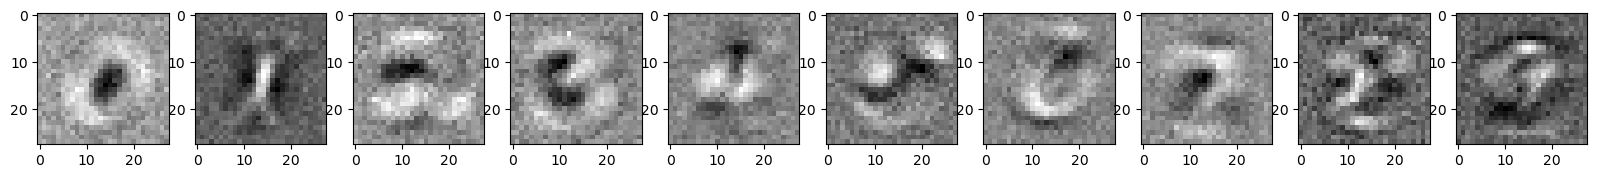

In [20]:
#Visualising filters
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')

In [22]:
print(W)

tensor([[-0.0268, -0.0082,  0.0014,  ..., -0.0721,  0.0084, -0.0309],
        [ 0.0243,  0.0323,  0.0323,  ..., -0.0110, -0.0363, -0.0229],
        [-0.0344, -0.0149, -0.0045,  ..., -0.0431, -0.0278,  0.0107],
        ...,
        [ 0.0095, -0.0169, -0.0400,  ..., -0.0011,  0.0402,  0.0305],
        [-0.0451, -0.0300, -0.0123,  ...,  0.0254, -0.0896,  0.0857],
        [-0.0850,  0.0092,  0.0297,  ..., -0.0004,  0.0544,  0.0322]], requires_grad=True)
tensor([[-0.0268, -0.0082,  0.0014,  ..., -0.0721,  0.0084, -0.0309],
        [ 0.0243,  0.0323,  0.0323,  ..., -0.0110, -0.0363, -0.0229],
        [-0.0344, -0.0149, -0.0045,  ..., -0.0431, -0.0278,  0.0107],
        ...,
        [ 0.0095, -0.0169, -0.0400,  ..., -0.0011,  0.0402,  0.0305],
        [-0.0451, -0.0300, -0.0123,  ...,  0.0254, -0.0896,  0.0857],
        [-0.0850,  0.0092,  0.0297,  ..., -0.0004,  0.0544,  0.0322]], requires_grad=True)


## In summary

In [23]:
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)


# Initialize parameters
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)


for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9035000205039978
Test accuracy: 0.9035000205039978


## Higher level APIs

In [24]:
class xW_plus_b:
    def __init__(self, dim_in, dim_out):
        self.W = torch.randn(dim_in, dim_out)/np.sqrt(dim_in)
        self.W.requires_grad_()
        self.b = torch.zeros(dim_out, requires_grad=True)
        
    def forward(self, x):
        return torch.matmul(x, self.W) + self.b
    

lin_custom = xW_plus_b(784, 10)
print("W: {}".format(lin_custom.W.shape))
print("b: {}".format(lin_custom.b.shape))

x_rand = torch.randn(1,784)
y = lin_custom.forward(x_rand)
print(y.shape)

W: torch.Size([784, 10])
b: torch.Size([10])
torch.Size([1, 10])
W: torch.Size([784, 10])
b: torch.Size([10])
torch.Size([1, 10])


The above linear transformation can be simplified with torch.nn

In [25]:
import torch.nn as nn

In [26]:
lin = nn.Linear(784, 10)
print("Linear parameters: {}".format([p.shape for p in lin.parameters()]))

y = lin(x_rand)
print(y.shape)

Linear parameters: [torch.Size([10, 784]), torch.Size([10])]
torch.Size([1, 10])
Linear parameters: [torch.Size([10, 784]), torch.Size([10])]
torch.Size([1, 10])


torch.nn.Linear class we just saw is a subclass of torch.nn.Module.

In [27]:
class lr_MNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, x):
        return self.lin(x)

In [28]:
model = lr_MNIST()
y = model(x_rand)
print("The model: \n{}".format(model))
print("\nParameters: \n{}".format(list(model.parameters())))
print("\nOutput shape: \n{}".format(y.shape))

The model: 
lr_MNIST(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

Parameters: 
[Parameter containing:
tensor([[-0.0119,  0.0036,  0.0151,  ..., -0.0139,  0.0340,  0.0122],
        [-0.0197,  0.0176,  0.0076,  ...,  0.0042, -0.0272, -0.0131],
        [-0.0015, -0.0190, -0.0209,  ..., -0.0282,  0.0110,  0.0300],
        ...,
        [ 0.0196,  0.0071,  0.0274,  ...,  0.0294,  0.0140,  0.0298],
        [-0.0341, -0.0171, -0.0256,  ...,  0.0343,  0.0286,  0.0037],
        [ 0.0324, -0.0123,  0.0016,  ...,  0.0134, -0.0179, -0.0328]], requires_grad=True), Parameter containing:
tensor([ 0.0293, -0.0207,  0.0016,  0.0126,  0.0005, -0.0194, -0.0193,  0.0353,  0.0302,  0.0202],
       requires_grad=True)]

Output shape: 
torch.Size([1, 10])
The model: 
lr_MNIST(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

Parameters: 
[Parameter containing:
tensor([[-0.0119,  0.0036,  0.0151,  ..., -0.0139,  0.0340,  0.0122],
        [-0.0197,  0.0176,  0.0076,  ...,  0.0

In [29]:
# defining loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [30]:
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = model(x)
    loss = criterion(y, labels)
    # Backward pass
    loss.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]